In [12]:
pip install python-dotenv


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip show pydantic

Name: pydantic
Version: 2.11.3
Summary: Data validation using Python type hints
Home-page: 
Author: 
Author-email: Samuel Colvin <s@muelcolvin.com>, Eric Jolibois <em.jolibois@gmail.com>, Hasan Ramezani <hasan.r67@gmail.com>, Adrian Garcia Badaracco <1755071+adriangb@users.noreply.github.com>, Terrence Dorsey <terry@pydantic.dev>, David Montague <david@pydantic.dev>, Serge Matveenko <lig@countzero.co>, Marcelo Trylesinski <marcelotryle@gmail.com>, Sydney Runkle <sydneymarierunkle@gmail.com>, David Hewitt <mail@davidhewitt.io>, Alex Hall <alex.mojaki@gmail.com>, Victorien Plot <contact@vctrn.dev>
License: 
Location: /Users/mjillepalli/anaconda3/lib/python3.11/site-packages
Requires: annotated-types, pydantic-core, typing-extensions, typing-inspection
Required-by: anaconda-cloud-auth, chromadb, fastapi, groq, langchain, langchain-core, langsmith, multion, openai, pydantic-settings
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install playwright


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install openai

  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/59/aa/84e02ab500ca871eb8f62784426963a1c7c17a72fea3c7f268af4bbaafa5/openai-1.76.0-py3-none-any.whl.metadata
  Obtaining dependency information for jiter<1,>=0.4.0 from https://files.pythonhosted.org/packages/fb/1b/a7e5e42db9fa262baaa9489d8d14ca93f8663e7f164ed5e9acc9f467fc00/jiter-0.9.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.2/661.2 kB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.9/320.9 kB 1.4 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install helper 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install helper


Note: you may need to restart the kernel to use updated packages.


In [18]:
# Add your utilities or helper functions to this file.

import os
from dotenv import load_dotenv, find_dotenv
from openai import OpenAI
from multion.client import MultiOn
import base64
from io import BytesIO
from PIL import Image
from IPython.display import display, HTML, Markdown

# these expect to find a .env file at the directory above the lesson.                                                                                                                     # the format for that file is (without the comment)                                                                                                                                       #API_KEYNAME=AStringThatIsTheLongAPIKeyFromSomeService                                                                                                                                   
def load_env():
    _ = load_dotenv(find_dotenv())

def get_openai_api_key():
    load_env()
    openai_api_key = os.getenv("OPENAI_API_KEY")
    return openai_api_key
    
def get_openai_client():
    openai_api_key = get_openai_api_key()
    return OpenAI(api_key=openai_api_key)

def get_multi_on_api_key():
    load_env()
    multi_on_api_key = os.getenv("MULTION_API_KEY")
    return multi_on_api_key

def get_multi_on_client():
    multi_on_api_key = get_multi_on_api_key()
    return MultiOn(api_key=multi_on_api_key)

# Params
async def visualizeCourses(result, screenshot, target_url, instructions, base_url):
    # Run the async process that returns an instance of DeeplearningCourseList and screenshot bytes
    

    if result:
        # Convert each course to a dict (using model_dump from Pydantic v2)
        courses_data = [course.model_dump() for course in result.courses]

        for course in courses_data:
          if course['courseURL']:
            course['courseURL'] = f'<a href="{base_url}{course["courseURL"]}" target="_blank">{course["title"]}</a>'


        # Build an HTML table if course data is available
        if courses_data:
            # Extract headers from the first course
            headers = courses_data[0].keys()
            table_html = '<table style="border-collapse: collapse; width: 100%;">'
            table_html += '<thead><tr>'
            for header in headers:
                table_html += (
                    f'<th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">'
                    f'{header}</th>'
                )
            table_html += '</tr></thead>'
            table_html += '<tbody>'
            for course in courses_data:
                table_html += '<tr>'
                for header in headers:
                    value = course[header]
                    # If the field is "imageUrl", embed the image in the table cell
                    if header == "imageUrl":
                        value = (f'<img src="{value}" alt="Course Image" '
                                 f'style="max-width:100px; height:auto;">')
                    elif isinstance(value, list):
                        value = ', '.join(value)
                    table_html += (
                        f'<td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">'
                        f'{value}</td>'
                    )
                table_html += '</tr>'
            table_html += '</tbody></table>'
        else:
            table_html = "<p>No course data available.</p>"

        # Display the course data table
        display(Markdown("### Scraped Course Data:"))
        display(HTML(table_html))

        # Convert the screenshot bytes into a base64 string and embed it in an <img> tag
        img_b64 = base64.b64encode(screenshot).decode('utf-8')
        img_html = (
            f'<img src="data:image/png;base64,{img_b64}" '
            f'alt="Website Screenshot" style="max-width:100%; height:auto;">'
        )
        display(Markdown("### Website Screenshot:"))
        display(HTML(img_html))




In [39]:
import os
from openai import OpenAI
import nest_asyncio

OPEN_API_KEY = " ENTER your API KEY HERE "




In [47]:
import asyncio
import json
import os
import nest_asyncio
import pprint
import base64
from io import BytesIO
import pandas as pd
from playwright.async_api import async_playwright
from openai import OpenAI
from PIL import Image
from tabulate import tabulate
from IPython.display import display, HTML, Markdown
from helper import get_openai_api_key, visualizeCourses
from pydantic import BaseModel


In [ ]:
## Initialized OPENAI KEY 

In [48]:
client = OpenAI(api_key=OPEN_API_KEY)

nest_asyncio.apply()


In [ ]:
## Created a WEBSCRAPER AGENT HERE which scrapes the web 

In [49]:
class WebScraperAgent:
    def __init__(self):
        self.playwright = None
        self.browser = None
        self.page = None

    async def init_browser(self):
      self.playwright = await async_playwright().start()
      self.browser = await self.playwright.chromium.launch(
          headless=True,
          args=[
              "--disable-dev-shm-usage",
              "--no-sandbox",
              "--disable-setuid-sandbox",
              "--disable-accelerated-2d-canvas",
              "--disable-gpu",
              "--no-zygote",
              "--disable-audio-output",
              "--disable-software-rasterizer",
              "--disable-webgl",
              "--disable-web-security",
              "--disable-features=LazyFrameLoading",
              "--disable-features=IsolateOrigins",
              "--disable-background-networking"
          ]
      )
      self.page = await self.browser.new_page()

    async def scrape_content(self, url):
        if not self.page or self.page.is_closed():
            await self.init_browser()
        await self.page.goto(url, wait_until="load")
        await self.page.wait_for_timeout(2000)  # Wait for dynamic content
        return await self.page.content()

    async def take_screenshot(self, path="screenshot.png"):
        await self.page.screenshot(path=path, full_page=True)
        return path
    async def screenshot_buffer(self):
        screenshot_bytes = await self.page.screenshot(type="png", full_page=False)
        return screenshot_bytes

    async def close(self):
        await self.browser.close()
        await self.playwright.stop()
        self.playwright = None
        self.browser = None
        self.page = None

In [50]:
scraper = WebScraperAgent()

In [ ]:
## STRUCTUED THE DATA FORMAT 

In [51]:
class DeeplearningCourse(BaseModel):
    title: str
    description: str
    presenter: list[str]
    imageUrl: str
    courseURL: str

class DeeplearningCourseList(BaseModel):
    courses: list[DeeplearningCourse]

In [ ]:
##LLM CLIENT FOR OPEN AI 

In [52]:
async def process_with_llm(html, instructions, truncate = False):
    completion = client.beta.chat.completions.parse(
        model="gpt-4o-mini-2024-07-18",
        messages=[{
            "role": "system",
            "content": f"""
            You are an expert web scraping agent. Your task is to:
            Extract relevant information from this HTML to JSON 
            following these instructions:
            {instructions}
            
            Extract the title, description, presenter, 
            the image URL and course URL for each of 
            all the courses for the deeplearning.ai website

            Return ONLY valid JSON, no markdown or extra text."""
        }, {
            "role": "user",
            "content": html[:150000]  # Truncate to stay under token limits
        }],
        temperature=0.1,
        response_format=DeeplearningCourseList,
        )
    return completion.choices[0].message.parsed

In [53]:
async def webscraper(target_url, instructions):
    result = None
    try:
        # Scrape content and capture screenshot
        print("Extracting HTML Content \n")
        html_content = await scraper.scrape_content(target_url)

        print("Taking Screenshot \n")
        screenshot = await scraper.screenshot_buffer()
        # Process content

        print("Processing..")
        result: DeeplearningCourseList = await process_with_llm(html_content, instructions, False)
        print("\nGenerated Structured Response")
    except Exception as e:
        print(f"❌ Error: {str(e)}")
    finally:
        await scraper.close()
    return result, screenshot

In [54]:
target_url = "https://www.deeplearning.ai/courses"  # Deeplearning AI courses
base_url="https://deeplearning.ai"

In [57]:
pip install Playwright

Note: you may need to restart the kernel to use updated packages.


In [60]:
instructions = """
    Get all the courses
"""
result, screenshot = await webscraper(target_url, instructions)

Extracting HTML Content 

Taking Screenshot 

Processing..

Generated Structured Response


### Scraped Course Data:

title,description,presenter,imageUrl,courseURL
Building Code Agents with Hugging Face smolagents,"Build agents that write and execute code to perform complex tasks, using Hugging Face’s smolagents.",Hugging Face,,Building Code Agents with Hugging Face smolagents
Building AI Browser Agents,"Build agents that navigate and interact with websites, and learn how to make them more reliable.",AGI Inc,,Building AI Browser Agents
Getting Structured LLM Output,Learn how to generate structured outputs to power production-ready LLM software applications.,DotTxt,,Getting Structured LLM Output
Vibe Coding 101 with Replit,"Design, build, and deploy apps with an AI coding agent in an integrated web development environment.",Replit,,Vibe Coding 101 with Replit
Data Analytics Professional Certificate,"Build a solid data analytics foundation using industry standard and AI tools to extract insights, make decisions, and solve real-world business problems.",DeepLearning.AI,,Data Analytics Professional Certificate
Long-Term Agentic Memory with LangGraph,"Learn to build AI agents with long-term memory with LangGraph, using LangMem for memory management.",LangChain,,Long-Term Agentic Memory with LangGraph
Event-Driven Agentic Document Workflows,Build an event-driven agentic workflow to process documents and fill forms using RAG and human-in-the-loop feedback.,LlamaIndex,,Event-Driven Agentic Document Workflows
Build Apps with Windsurf’s AI Coding Agents,"Learn to build, debug, and deploy applications with an Agentic AI-powered integrated development environment.",Windsurf,,Build Apps with Windsurf’s AI Coding Agents
Evaluating AI Agents,"Learn how to systematically evaluate, improve, and iterate on AI agents using structured assessments.",Arize AI,,Evaluating AI Agents
Attention in Transformers: Concepts and Code in PyTorch,"Understand and implement the attention mechanism, a key element of transformer-based LLMs, using PyTorch.",StatQuest,,Attention in Transformers: Concepts and Code in PyTorch


### Website Screenshot:


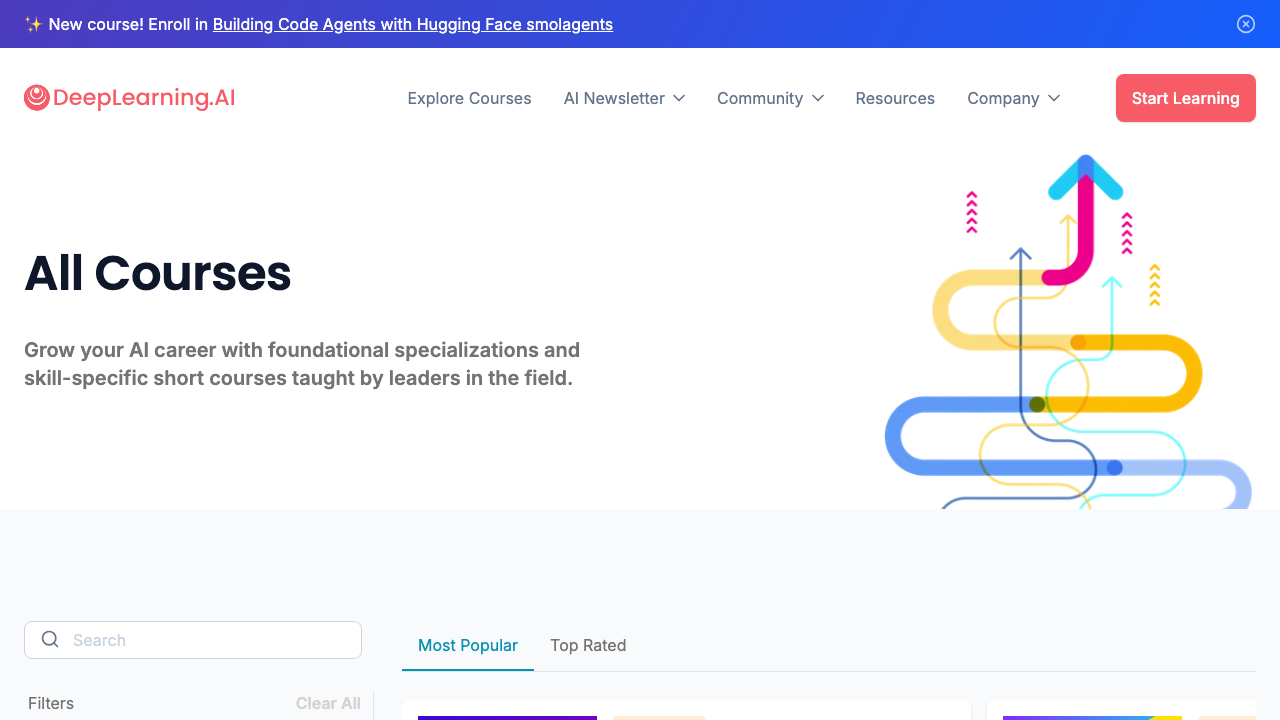

In [61]:
await visualizeCourses(result=result, 
                       screenshot=screenshot, 
                       target_url=target_url, 
                       instructions=instructions, 
                       base_url=base_url)

In [62]:
subject = "Retrieval Augmented Generation (RAG) "

instructions = f"""
Read the description of the courses and only 
provide the three courses that are about {subject}. 
Make sure that we don't have any other
cources in the output
"""
result, screenshot = await webscraper(target_url, instructions)

Extracting HTML Content 

Taking Screenshot 

Processing..

Generated Structured Response


### Scraped Course Data:

title,description,presenter,imageUrl,courseURL
Event-Driven Agentic Document Workflows,Build an event-driven agentic workflow to process documents and fill forms using RAG and human-in-the-loop feedback.,LlamaIndex,,Event-Driven Agentic Document Workflows
LLMs as Operating Systems: Agent Memory,Build systems with MemGPT agents that can autonomously manage their memory.,Letta,,LLMs as Operating Systems: Agent Memory
Practical Multi AI Agents and Advanced Use Cases with crewAI,Build agents that collaborate to solve complex business tasks.,crewAI,,Practical Multi AI Agents and Advanced Use Cases with crewAI


### Website Screenshot:


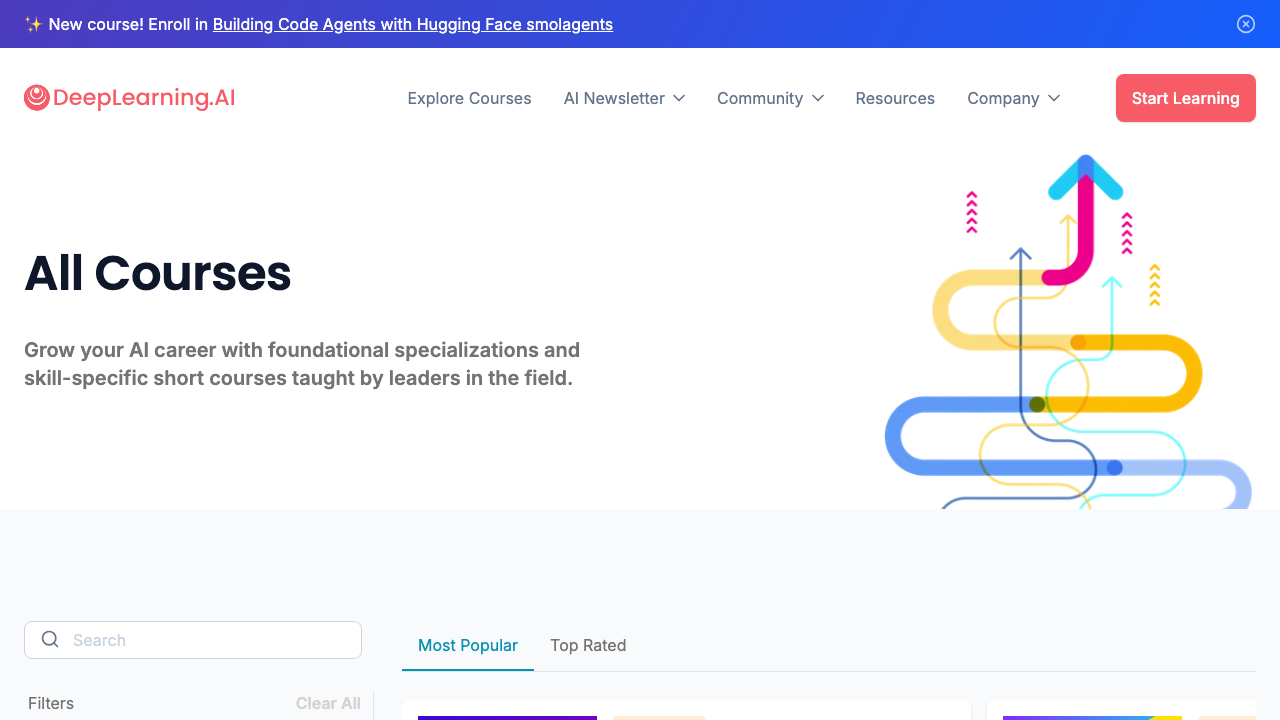

In [64]:
await visualizeCourses(result=result, 
                       screenshot=screenshot, 
                       target_url=target_url, 
                       instructions=instructions, 
                       base_url=base_url)

In [59]:
!git init


Initialized empty Git repository in /Users/mjillepalli/AI Agent Projects /.git/


In [60]:
!git config --global user.name "ManichandanaJillepalli"
!git config --global user.email "manichandanajillepalli@gmail.com"


In [61]:
!git add .


In [62]:
!git commit -m "Initial commit from Jupyter notebook"


[main (root-commit) 8094148] Initial commit from Jupyter notebook
 14 files changed, 1951 insertions(+)
 create mode 100644 .ipynb_checkpoints/Web Agent  Scraper - -checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/agentops-checkpoint.log
 create mode 100644 .ipynb_checkpoints/env-checkpoint.txt
 create mode 100644 .ipynb_checkpoints/helper-checkpoint.py
 create mode 100644 .ipynb_checkpoints/requirements-checkpoint.txt
 create mode 100644 .ipynb_checkpoints/utils-checkpoint.py
 create mode 100644 Web Agent  Scraper - .ipynb
 create mode 100644 __pycache__/helper.cpython-311.pyc
 create mode 100644 __pycache__/utils.cpython-311.pyc
 create mode 100644 agentops.log
 create mode 100644 env.txt
 create mode 100644 helper.py
 create mode 100644 requirements.txt
 create mode 100644 utils.py


In [63]:
!git remote add origin https://github.com/ManichandanaJillepalli/AI-Portfolio


In [65]:
!git push -u origin main


To https://github.com/ManichandanaJillepalli/AI-Portfolio
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/ManichandanaJillepalli/AI-Portfolio'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [66]:
!git pull origin main --allow-unrelated-histories


remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (13/13), 5.97 KiB | 470.00 KiB/s, done.
From https://github.com/ManichandanaJillepalli/AI-Portfolio
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
hint: You have divergent branches and need to specify how to reconcile them.
hint: You can do so by running one of the following commands sometime before
hint: your next pull:
hint: 
hint:   git config pull.rebase false  # merge
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hi

In [67]:
!git config pull.rebase false


In [68]:
!git pull origin main


From https://github.com/ManichandanaJillepalli/AI-Portfolio
 * branch            main       -> FETCH_HEAD
fatal: refusing to merge unrelated histories


In [ ]:
!git pull origin main --allow-unrelated-histories


From https://github.com/ManichandanaJillepalli/AI-Portfolio
 * branch            main       -> FETCH_HEAD
hint: Waiting for your editor to close the file... 7[>4;2m="~/AI Agent Projects /.git/MERGE_MSG" 6L, 304B▽  Pzz\[0%m           [>c]10;?]11;?Merge branch 'main' of https://github.com/ManichandanaJillepalli/AI-Portfolio
# Please enter a commit message to explain why this merge is necessary,# especially if it merges an updated upstream into a topic branch.#
# Lines starting with '#' will be ignored, and an empty message aborts
# the commit.
~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                        